<h1>Segmenting and Clustering Neighborhoods in Toronto</h1>

Analysis by Rafael Faria Pinheiro

<b>I YOU CAN'T SEE THE MAPS (DUE TO GITHUB), PLEASE CHECK THE HTML VERSION OF THIS NOTEBOOK
<a href=https://s3-sa-east-1.amazonaws.com/www.rafael.digital/temp/assign_s3.html>HERE</a></b>

<h2> Part 1</h2>

<h3>Importing libraries</h3>

In [3]:
!pip install lxml
import lxml
import numpy as np
import pandas as pd

<h3>Getting tables from a Wikipedia page</h3>

In [ ]:
wiki_dfs = pd.read_html('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M')
print(type(wiki_dfs), len(wiki_dfs))

<h3> Getting the table of postal code

In [ ]:
df_zipcode = wiki_dfs[0]
print(type(df_zipcode), df_zipcode.shape)
df_zipcode.head(10)

<h3>Removing rows when borough is not assigned</h3>

In [ ]:
df_zipcode = df_zipcode[df_zipcode['Borough']!= 'Not assigned'].copy()
print(df_zipcode.shape)
df_zipcode.head(10)

<h3>Checking unique postal codes on  dataframe</h3>

In [ ]:
df_zipcode.groupby('Postal Code').count().shape

<h3>Checking rows with not assigned neighborhood</h3>

In [ ]:
df_zipcode[df_zipcode['Neighborhood']== 'Not assigned'].shape

<h3>Number of rows on dataframe</h3>

In [ ]:
df_zipcode.shape[0]

<h2>Part 2</h2>

<h3>Getting coordinates</h3>

In [ ]:
import requests
import time

def get_coords_from_zipcode(zipcode,country):  
    try:
        time.sleep(5)
        url = f'https://www.google.com/maps/place/{zipcode}, {country}/'
        text = requests.get(url).text
        str_start = "https://maps.google.com/maps/api/staticmap?center="
        start = text.find(str_start)
        end=text.find("&amp;zoom=",start)
        coords = text[start+len(str_start):end].split("%2C")
        lat = coords[0]
        long = coords[1]       
    except Exception as e:
        return (['0','0'])
    return(coords)

In [ ]:
def get_coords(row):
    coords = get_coords_from_zipcode(row['Postal Code'], 'Canada')
    
    row['latitude'] = coords[0]
    row['longitude'] = coords[1]
    
    return row

In [ ]:
df_zipcode = df_zipcode.apply(lambda row: get_coords(row), axis=1)

In [8]:
len(df_zipcode[df_zipcode['latitude']== '0'])

0

In [ ]:
df_zipcode.sort_values('Postal Code', inplace=True)
df_zipcode.set_index('Postal Code', inplace=True, drop=False)

In [16]:
df_zipcode

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern, Rouge",43.8066863,-79.1943534
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.7845351,-79.1604971
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.7635726,-79.1887115
3,M1G,Scarborough,Woburn,43.7709921,-79.2169174
4,M1H,Scarborough,Cedarbrae,43.773136,-79.2394761
5,M1J,Scarborough,Scarborough Village,43.7447342,-79.2394761
6,M1K,Scarborough,"Kennedy Park, Ionview, East Birchmount Park",43.7279292,-79.2620294
7,M1L,Scarborough,"Golden Mile, Clairlea, Oakridge",43.7111117,-79.2845772
8,M1M,Scarborough,"Cliffside, Cliffcrest, Scarborough Village West",43.716316,-79.2394761
9,M1N,Scarborough,"Birch Cliff, Cliffside West",43.692657,-79.2648481


<h2>Part 3</h2>

<h3>Plotting Neighborhoods of Toronto</h3>

In [81]:
!pip install folium
import folium

In [82]:
latitude, longitude = list(df_zipcode[['Latitude','Longitude']].astype('float64').mean())
print('The average geograpical coordinates of Toronto are {}, {}.'.format(latitude, longitude))

The average geograpical coordinates of Toronto are 43.70455598446602, -79.39723675631066.


In [84]:
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=11) 

for lat, lng, borough, neighborhood in zip(df_zipcode['Latitude'], df_zipcode['Longitude'], df_zipcode['Borough'], df_zipcode['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto) 
    
map_toronto

<h3> Visualizing only Boroughs that contain the word 'Toronto'</h3>

In [85]:
toronto = df_zipcode[df_zipcode['Borough'].str.contains('Toronto')].reset_index(drop=True)
print(toronto.shape)
toronto.head(10)

(39, 5)


,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M4E,East Toronto,The Beaches,43.6763574,-79.2930312
1,M4K,East Toronto,"The Danforth West, Riverdale",43.6795571,-79.352188
2,M4L,East Toronto,"India Bazaar, The Beaches West",43.6689985,-79.3155716
3,M4M,East Toronto,Studio District,43.6595255,-79.340923
4,M4N,Central Toronto,Lawrence Park,43.7280205,-79.3887901
5,M4P,Central Toronto,Davisville North,43.7127511,-79.3901975
6,M4R,Central Toronto,"North Toronto West, Lawrence Park",43.7153834,-79.4056784
7,M4S,Central Toronto,Davisville,43.7043244,-79.3887901
8,M4T,Central Toronto,"Moore Park, Summerhill East",43.6895743,-79.3831599
9,M4V,Central Toronto,"Summerhill West, Rathnelly, South Hill, Forest...",43.6864123,-79.4000493


In [86]:
latitude, longitude = list(toronto[['Latitude','Longitude']].astype('float64').mean())
print(latitude, longitude)

43.66713498717948 -79.38987324871793


In [87]:
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=12) 

for lat, lng, borough, neighborhood in zip(toronto['Latitude'], toronto['Longitude'], toronto['Borough'], toronto['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto) 
    
map_toronto

<h3>Define Foursquare Credentials and Version</h3>

In [1]:
CLIENT_ID = 'CLIENT_ID' # your Foursquare ID
CLIENT_SECRET = 'CLIENT_SECRET' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: CLIENT_ID
CLIENT_SECRET:CLIENT_SECRET


<h3> Using Foursquare API to get venues by neighborhood </h3>

In [105]:
import requests

def getNearbyVenues(names, latitudes, longitudes, radius=500, limit=100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            limit)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [150]:
toronto_venues = getNearbyVenues(names=toronto['Neighborhood'],
                                    latitudes=toronto['Latitude'],
                                    longitudes=toronto['Longitude'],
                                    radius = 1000
                                  )

The Beaches
The Danforth West, Riverdale
India Bazaar, The Beaches West
Studio District
Lawrence Park
Davisville North
North Toronto West, Lawrence Park
Davisville
Moore Park, Summerhill East
Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park
Rosedale
St. James Town, Cabbagetown
Church and Wellesley
Regent Park, Harbourfront
Garden District, Ryerson
St. James Town
Berczy Park
Central Bay Street
Richmond, Adelaide, King
Harbourfront East, Union Station, Toronto Islands
Toronto Dominion Centre, Design Exchange
Commerce Court, Victoria Hotel
Roselawn
Forest Hill North & West, Forest Hill Road Park
The Annex, North Midtown, Yorkville
University of Toronto, Harbord
Kensington Market, Chinatown, Grange Park
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport
Stn A PO Boxes
First Canadian Place, Underground city
Christie
Dufferin, Dovercourt Village
Little Portugal, Trinity
Brockton, Parkdale Village, Exhibition Place
High 

In [151]:
print(toronto_venues.shape)
toronto_venues.head()

(3181, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,The Beaches,43.6763574,-79.2930312,Glen Manor Ravine,43.676821,-79.293942,Trail
1,The Beaches,43.6763574,-79.2930312,Tori's Bakeshop,43.672114,-79.290331,Vegetarian / Vegan Restaurant
2,The Beaches,43.6763574,-79.2930312,The Beech Tree,43.680493,-79.288846,Gastropub
3,The Beaches,43.6763574,-79.2930312,Beaches Bake Shop,43.680363,-79.289692,Bakery
4,The Beaches,43.6763574,-79.2930312,Ed's Real Scoop,43.672630,-79.287993,Ice Cream Shop


Checking amount of venues by neighborhood

In [152]:
toronto_venues.groupby('Neighborhood')['Venue'].count().sort_values(ascending=False)

Neighborhood
University of Toronto, Harbord                                                                                100
Parkdale, Roncesvalles                                                                                        100
Brockton, Parkdale Village, Exhibition Place                                                                  100
Central Bay Street                                                                                            100
Christie                                                                                                      100
Church and Wellesley                                                                                          100
Commerce Court, Victoria Hotel                                                                                100
Davisville                                                                                                    100
Davisville North                                                           

In [153]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 275 uniques categories.


<h3>Analyzing each neighborhood</h3>

In [154]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Zoo,Accessories Store,Airport,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,Aquarium,Art Gallery,Art Museum,...,Train Station,Turkish Restaurant,University,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Yoga Studio
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [155]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

,Neighborhood,Zoo,Accessories Store,Airport,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,Aquarium,Art Gallery,...,Train Station,Turkish Restaurant,University,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Yoga Studio
0,Berczy Park,0.00,0.00,0.000000,0.010000,0.00,0.00,0.00,0.00,0.020000,...,0.01,0.00,0.00,0.010000,0.00,0.00,0.000000,0.00,0.000000,0.000000
1,"Brockton, Parkdale Village, Exhibition Place",0.00,0.01,0.000000,0.010000,0.00,0.00,0.00,0.00,0.010000,...,0.00,0.00,0.00,0.020000,0.00,0.00,0.000000,0.00,0.000000,0.000000
2,"Business reply mail Processing Centre, South C...",0.00,0.00,0.000000,0.021277,0.00,0.00,0.00,0.00,0.000000,...,0.00,0.00,0.00,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.000000
3,"CN Tower, King and Spadina, Railway Lands, Har...",0.00,0.00,0.066667,0.000000,0.00,0.00,0.00,0.00,0.000000,...,0.00,0.00,0.00,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.000000
4,Central Bay Street,0.00,0.00,0.000000,0.010000,0.00,0.00,0.00,0.00,0.020000,...,0.00,0.00,0.01,0.020000,0.00,0.00,0.000000,0.00,0.000000,0.020000
5,Christie,0.00,0.00,0.000000,0.010000,0.00,0.00,0.00,0.00,0.010000,...,0.00,0.00,0.00,0.020000,0.00,0.00,0.010000,0.00,0.010000,0.000000
6,Church and Wellesley,0.00,0.00,0.000000,0.010000,0.00,0.00,0.00,0.00,0.010000,...,0.00,0.00,0.00,0.000000,0.00,0.01,0.000000,0.00,0.000000,0.020000
7,"Commerce Court, Victoria Hotel",0.00,0.00,0.000000,0.010000,0.00,0.00,0.00,0.00,0.020000,...,0.01,0.00,0.00,0.020000,0.00,0.00,0.000000,0.00,0.000000,0.000000
8,Davisville,0.00,0.00,0.000000,0.000000,0.00,0.00,0.00,0.00,0.000000,...,0.00,0.00,0.00,0.010000,0.01,0.00,0.010000,0.00,0.010000,0.010000
9,Davisville North,0.00,0.00,0.000000,0.000000,0.00,0.00,0.00,0.00,0.000000,...,0.00,0.00,0.00,0.010000,0.00,0.00,0.010000,0.00,0.010000,0.020000


In [156]:
toronto_grouped.shape

(39, 275)

<h3>Top 10 most common venues by Neighborhood</h3>

In [157]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [260]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(10)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berczy Park,Coffee Shop,Restaurant,Hotel,Japanese Restaurant,Café,Park,Beer Bar,Gastropub,Art Gallery,Liquor Store
1,"Brockton, Parkdale Village, Exhibition Place",Café,Coffee Shop,Restaurant,Bar,Bakery,Furniture / Home Store,Tibetan Restaurant,Gift Shop,Italian Restaurant,Sandwich Place
2,"Business reply mail Processing Centre, South C...",Park,Brewery,Pizza Place,Coffee Shop,Burrito Place,Sushi Restaurant,Fast Food Restaurant,Italian Restaurant,Pub,Restaurant
3,"CN Tower, King and Spadina, Railway Lands, Har...",Harbor / Marina,Café,Coffee Shop,Garden,Park,Scenic Lookout,Dog Run,Sculpture Garden,Sushi Restaurant,Dance Studio
4,Central Bay Street,Coffee Shop,Café,Ramen Restaurant,Park,Clothing Store,Yoga Studio,Sushi Restaurant,Burrito Place,Plaza,Pizza Place
5,Christie,Korean Restaurant,Coffee Shop,Café,Grocery Store,Cocktail Bar,Mexican Restaurant,Diner,Park,Ice Cream Shop,Pizza Place
6,Church and Wellesley,Coffee Shop,Park,Japanese Restaurant,Diner,Yoga Studio,Café,Ice Cream Shop,Bookstore,Burger Joint,Italian Restaurant
7,"Commerce Court, Victoria Hotel",Coffee Shop,Café,Hotel,Restaurant,Seafood Restaurant,Japanese Restaurant,Concert Hall,Cosmetics Shop,Theater,Plaza
8,Davisville,Coffee Shop,Italian Restaurant,Sushi Restaurant,Café,Mexican Restaurant,Gym,Dessert Shop,Restaurant,Pizza Place,Indian Restaurant
9,Davisville North,Coffee Shop,Italian Restaurant,Café,Restaurant,Pizza Place,Fast Food Restaurant,Gym,Sushi Restaurant,Dessert Shop,Pub


<h3> Clustering neighborhoods</h3>

In [261]:
from sklearn.cluster import KMeans

Using K-Means to cluster neighborhoods in 5 groups

In [262]:
# set number of clusters
kclusters = 8

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1).copy()

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)
kmeans.labels_

array([1, 3, 5, 2, 0, 3, 0, 1, 0, 0, 3, 1, 4, 0, 1, 3, 3, 3, 7, 3, 5, 0,
       3, 0, 0, 1, 5, 4, 0, 1, 6, 1, 3, 5, 3, 5, 0, 1, 3])

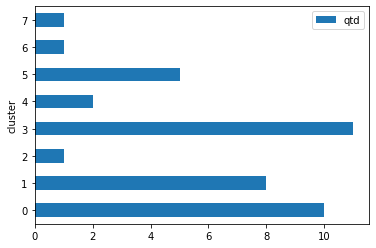

In [263]:
# check cluster labels generated for each row in the dataframe
hist = pd.DataFrame(data=kmeans.labels_,columns=['cluster'])
hist['qtd'] =1
hist.groupby(by='cluster').count().plot.barh()

Top 10 most common venues by Neighborhood

In [264]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = toronto.copy()

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

toronto_merged.head() # check the last columns!

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M4E,East Toronto,The Beaches,43.6763574,-79.2930312,5,Pub,Coffee Shop,Pizza Place,Beach,Japanese Restaurant,Breakfast Spot,Park,Grocery Store,Burger Joint,Tea Room
1,M4K,East Toronto,"The Danforth West, Riverdale",43.6795571,-79.352188,0,Greek Restaurant,Coffee Shop,Café,Pub,Bank,Italian Restaurant,Fast Food Restaurant,Ramen Restaurant,Pizza Place,Bakery
2,M4L,East Toronto,"India Bazaar, The Beaches West",43.6689985,-79.3155716,3,Indian Restaurant,Coffee Shop,Beach,Café,Grocery Store,Burrito Place,Bakery,Brewery,Park,Butcher
3,M4M,East Toronto,Studio District,43.6595255,-79.340923,3,Coffee Shop,Bar,Café,Brewery,American Restaurant,Diner,Vietnamese Restaurant,Bakery,Italian Restaurant,French Restaurant
4,M4N,Central Toronto,Lawrence Park,43.7280205,-79.3887901,7,Trail,Café,Bookstore,Gym / Fitness Center,College Quad,College Gym,Coffee Shop,Park,Eastern European Restaurant,Doner Restaurant


Visualizing clusters

In [265]:
import matplotlib.cm as cm
import matplotlib.colors as colors

In [324]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-6],
        fill=True,
        fill_color=rainbow[cluster-6],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

<h3> Examining Clusters</h3>

Cluster 0 - Nice borough to eat or to have a coffee or for Parks

In [311]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[2] + list(range(5, toronto_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,"The Danforth West, Riverdale",0,Greek Restaurant,Coffee Shop,Café,Pub,Bank,Italian Restaurant,Fast Food Restaurant,Ramen Restaurant,Pizza Place,Bakery
5,Davisville North,0,Coffee Shop,Italian Restaurant,Café,Restaurant,Pizza Place,Fast Food Restaurant,Gym,Sushi Restaurant,Dessert Shop,Pub
6,"North Toronto West, Lawrence Park",0,Coffee Shop,Italian Restaurant,Diner,Mexican Restaurant,Skating Rink,Café,Restaurant,Park,Sporting Goods Shop,Fast Food Restaurant
7,Davisville,0,Coffee Shop,Italian Restaurant,Sushi Restaurant,Café,Mexican Restaurant,Gym,Dessert Shop,Restaurant,Pizza Place,Indian Restaurant
12,Church and Wellesley,0,Coffee Shop,Park,Japanese Restaurant,Diner,Yoga Studio,Café,Ice Cream Shop,Bookstore,Burger Joint,Italian Restaurant
13,"Regent Park, Harbourfront",0,Coffee Shop,Diner,Theater,Café,Park,Breakfast Spot,Bakery,Italian Restaurant,Pub,Restaurant
14,"Garden District, Ryerson",0,Coffee Shop,Japanese Restaurant,Gastropub,Cosmetics Shop,Pizza Place,Italian Restaurant,Seafood Restaurant,Burrito Place,Middle Eastern Restaurant,Department Store
17,Central Bay Street,0,Coffee Shop,Café,Ramen Restaurant,Park,Clothing Store,Yoga Studio,Sushi Restaurant,Burrito Place,Plaza,Pizza Place
36,"Runnymede, Swansea",0,Coffee Shop,Café,Pizza Place,Bakery,Pub,Italian Restaurant,Park,Restaurant,Dessert Shop,Bank
37,"Queen's Park, Ontario Provincial Government",0,Coffee Shop,Park,Pizza Place,Ramen Restaurant,Café,Italian Restaurant,Sushi Restaurant,Yoga Studio,Thai Restaurant,Clothing Store


Cluster 1 - Nice borough to have a coffee, to find a hotel room or cultural places

In [312]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[2] + list(range(5, toronto_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
15,St. James Town,1,Café,Coffee Shop,Restaurant,Seafood Restaurant,Cosmetics Shop,Japanese Restaurant,Hotel,Italian Restaurant,Furniture / Home Store,Theater
16,Berczy Park,1,Coffee Shop,Restaurant,Hotel,Japanese Restaurant,Café,Park,Beer Bar,Gastropub,Art Gallery,Liquor Store
18,"Richmond, Adelaide, King",1,Coffee Shop,Café,Hotel,Theater,Tea Room,Beer Bar,Arts & Crafts Store,Restaurant,Sushi Restaurant,Plaza
19,"Harbourfront East, Union Station, Toronto Islands",1,Coffee Shop,Hotel,Café,Gym,Park,Theater,Brewery,Scenic Lookout,Plaza,Deli / Bodega
20,"Toronto Dominion Centre, Design Exchange",1,Café,Hotel,Coffee Shop,Japanese Restaurant,Restaurant,Concert Hall,Theater,Seafood Restaurant,Gym,Park
21,"Commerce Court, Victoria Hotel",1,Coffee Shop,Café,Hotel,Restaurant,Seafood Restaurant,Japanese Restaurant,Concert Hall,Cosmetics Shop,Theater,Plaza
28,Stn A PO Boxes,1,Coffee Shop,Restaurant,Café,Japanese Restaurant,Hotel,Seafood Restaurant,Beer Bar,Farmers Market,Gym,Park
29,"First Canadian Place, Underground city",1,Coffee Shop,Hotel,Café,Japanese Restaurant,Restaurant,Theater,Concert Hall,Monument / Landmark,Gym,Plaza


In [313]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[2] + list(range(5, toronto_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
27,"CN Tower, King and Spadina, Railway Lands, Har...",2,Harbor / Marina,Café,Coffee Shop,Garden,Park,Scenic Lookout,Dog Run,Sculpture Garden,Sushi Restaurant,Dance Studio


Cluster 2 - Nice borough to walk or dog run through the Marina

In [314]:
# Cluster 3 -- Nice borough to have a coffee, to eat or to find a Bar/pub

toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[2] + list(range(5, toronto_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,"India Bazaar, The Beaches West",3,Indian Restaurant,Coffee Shop,Beach,Café,Grocery Store,Burrito Place,Bakery,Brewery,Park,Butcher
3,Studio District,3,Coffee Shop,Bar,Café,Brewery,American Restaurant,Diner,Vietnamese Restaurant,Bakery,Italian Restaurant,French Restaurant
24,"The Annex, North Midtown, Yorkville",3,Coffee Shop,Vegetarian / Vegan Restaurant,Café,Italian Restaurant,Restaurant,Museum,Gym,Pub,Bakery,Grocery Store
25,"University of Toronto, Harbord",3,Café,Bakery,Restaurant,Bar,Coffee Shop,Bookstore,Beer Bar,Vegetarian / Vegan Restaurant,Mexican Restaurant,Museum
26,"Kensington Market, Chinatown, Grange Park",3,Café,Coffee Shop,Vegetarian / Vegan Restaurant,Bar,Yoga Studio,Art Gallery,Mexican Restaurant,Record Shop,Beer Bar,Caribbean Restaurant
30,Christie,3,Korean Restaurant,Coffee Shop,Café,Grocery Store,Cocktail Bar,Mexican Restaurant,Diner,Park,Ice Cream Shop,Pizza Place
31,"Dufferin, Dovercourt Village",3,Café,Coffee Shop,Park,Convenience Store,Sushi Restaurant,Bar,Bakery,Italian Restaurant,Pharmacy,Portuguese Restaurant
32,"Little Portugal, Trinity",3,Café,Restaurant,Bar,Vegetarian / Vegan Restaurant,Bakery,Pizza Place,Italian Restaurant,Cocktail Bar,Asian Restaurant,Men's Store
33,"Brockton, Parkdale Village, Exhibition Place",3,Café,Coffee Shop,Restaurant,Bar,Bakery,Furniture / Home Store,Tibetan Restaurant,Gift Shop,Italian Restaurant,Sandwich Place
34,"High Park, The Junction South",3,Café,Bar,Coffee Shop,Convenience Store,Thai Restaurant,Italian Restaurant,Restaurant,Sushi Restaurant,Bakery,Pizza Place


Cluster 4 - Nice borough to find banks, pharmacies and other services

In [315]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 4, toronto_merged.columns[[2] + list(range(5, toronto_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
22,Roselawn,4,Sushi Restaurant,Italian Restaurant,Pharmacy,Coffee Shop,Café,Bank,Asian Restaurant,Gastropub,Dry Cleaner,Skating Rink
23,"Forest Hill North & West, Forest Hill Road Park",4,Coffee Shop,Bank,Café,Sushi Restaurant,Park,Burger Joint,Trail,Bakery,Skating Rink,Pharmacy


Cluster 5 - Nice borough for Parks, Coffee Shops and Grocery Stores

In [316]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 5, toronto_merged.columns[[2] + list(range(5, toronto_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,The Beaches,5,Pub,Coffee Shop,Pizza Place,Beach,Japanese Restaurant,Breakfast Spot,Park,Grocery Store,Burger Joint,Tea Room
8,"Moore Park, Summerhill East",5,Coffee Shop,Grocery Store,Italian Restaurant,Park,Gym,Thai Restaurant,Bagel Shop,Pub,Restaurant,Sandwich Place
9,"Summerhill West, Rathnelly, South Hill, Forest...",5,Coffee Shop,Park,Sushi Restaurant,Thai Restaurant,Italian Restaurant,Grocery Store,Spa,Liquor Store,Pizza Place,Pub
10,Rosedale,5,Coffee Shop,Grocery Store,Park,Pie Shop,BBQ Joint,Filipino Restaurant,Convenience Store,Breakfast Spot,Candy Store,Bistro
38,"Business reply mail Processing Centre, South C...",5,Park,Brewery,Pizza Place,Coffee Shop,Burrito Place,Sushi Restaurant,Fast Food Restaurant,Italian Restaurant,Pub,Restaurant


Cluster 6 - Borough for Coffee Shops, Gastropubs, Parks and restaurants

In [317]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 6, toronto_merged.columns[[2] + list(range(5, toronto_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
11,"St. James Town, Cabbagetown",6,Coffee Shop,Gastropub,Japanese Restaurant,Park,Café,Deli / Bodega,Pub,Restaurant,Diner,Caribbean Restaurant


Cluster 7 - Borough for Trails, Coffee Shops and Bookstores

In [318]:
toronto_merged.loc[toronto_merged['Cluster Labels'] ==7, toronto_merged.columns[[2] + list(range(5, toronto_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Lawrence Park,7,Trail,Café,Bookstore,Gym / Fitness Center,College Quad,College Gym,Coffee Shop,Park,Eastern European Restaurant,Doner Restaurant
